<a href="https://colab.research.google.com/github/aashrithresearch/skinburn/blob/main/skinburns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
from fastai.callback.fp16 import *
import torch
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = ('/content/drive/MyDrive/skinburns')
print(os.listdir(path+'/train'))

['Second-Degree Burn and a Third-Degree Burn', 'Third-Degree Burn', 'First-Degree Burn, Second-Degree Burn, and a Third-Degree Burn', 'Second-Degree Burn', 'First-Degree Burn and a Second-Degree Burn', 'First-Degree Burn and a Third-Degree Burn', 'First-Degree Burn']


In [ ]:
burns = DataBlock(blocks = (ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(seed=42),
                  get_y=parent_label,
                  item_tfms=Resize(460),
                  batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = burns.dataloaders(path+'/train')

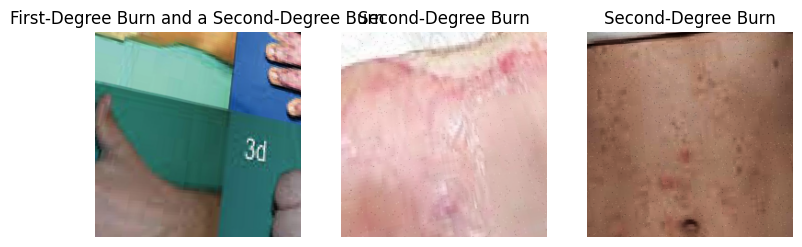

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy).to_fp16()
learn.fine_tune(15, freeze_epochs=5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 175MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,2.728091,1.627472,0.445431,15:54
1,2.060429,1.116305,0.645939,00:57
2,1.589186,0.917993,0.713198,00:57
3,1.303250,0.746988,0.737310,00:55
4,1.062354,0.681568,0.752538,00:58


epoch,train_loss,valid_loss,accuracy,time
0,0.766016,0.537508,0.809645,01:00
1,0.630103,0.391242,0.860406,00:56
2,0.514858,0.331815,0.889594,00:58
3,0.404961,0.329461,0.898477,00:58
4,0.338250,0.306649,0.898477,00:57
5,0.289148,0.267042,0.925127,00:57
6,0.224636,0.199032,0.945431,01:00
7,0.175059,0.190579,0.937817,00:56
8,0.151165,0.188972,0.946701,00:58
9,0.122554,0.157239,0.953046,00:59


/usr/local/lib/python3.10/dist-packages/fastai/interpret.py:149: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


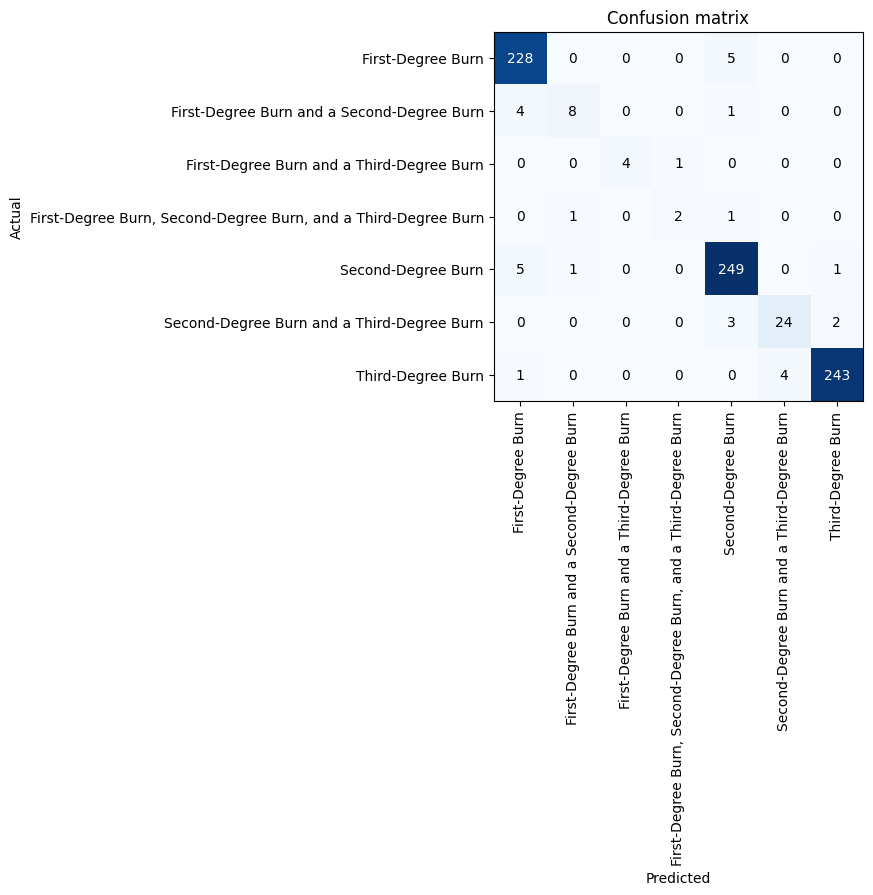

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: First-Degree Burn; Probability: 0.9965')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

from ipywidgets import *

In [ ]:
VBox([widgets.Label('Select your burn type'),
      btn_upload, btn_run, out_pl, lbl_pred])